In [1]:
# ======================================
# RED NEURONAL PARA PREDICCIÓN DE DESERCIÓN
# ======================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

2025-11-05 20:57:14.377776: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-05 20:57:14.380443: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-05 20:57:14.490103: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-05 20:57:16.261697: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

In [2]:
# 1️ Cargar datos
df = pd.read_csv("riesgo_desercion.csv")  # <-- tu archivo CSV
print("Datos cargados:", df.shape)

Datos cargados: (2000, 16)


In [3]:

# 2️⃣ Separar características (X) y objetivo (y)
X = df.drop('Riesgo_deserción', axis=1)
y = df['Riesgo_deserción']


In [4]:
# 3️⃣ Codificar variables categóricas
# Codificamos 'X' con One-Hot Encoding
X_encoded = pd.get_dummies(X, drop_first=False)

# Codificamos la variable objetivo con LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)


In [5]:
# 4️⃣ Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_categorical, test_size=0.2, random_state=42
)

In [6]:
# 5️⃣ Crear el modelo neuronal
model = Sequential([
    Dense(128 input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


/opt/conda/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-05 20:57:30.734156: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [7]:
# 6️⃣ Entrenar el modelo
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4961 - loss: 1.1228 - val_accuracy: 0.5375 - val_loss: 0.8467
Epoch 2/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7164 - loss: 0.7128 - val_accuracy: 0.8219 - val_loss: 0.5254
Epoch 3/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8813 - loss: 0.4200 - val_accuracy: 0.9750 - val_loss: 0.2413
Epoch 4/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9508 - loss: 0.2302 - val_accuracy: 0.9969 - val_loss: 0.1112
Epoch 5/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9789 - loss: 0.1309 - val_accuracy: 0.9969 - val_loss: 0.0625
Epoch 6/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9867 - loss: 0.0823 - val_accuracy: 0.9969 - val_loss: 0.0422
Epoch 7/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9937 - loss: 0.0528 - val_accuracy: 0.9969 - val_loss: 0.0307
Epoch 8/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9961 - loss: 0.0376 - val_accuracy: 0.9969 - val_loss

In [9]:
# 7️⃣ Evaluar desempeño
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

print("\nAccuracy:", accuracy_score(y_true, y_pred_classes))
print("\nReporte de clasificación:")
print(classification_report(y_true, y_pred_classes, target_names=le.classes_))


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

Accuracy: 0.9975

Reporte de clasificación:
                 precision    recall  f1-score   support

    Riesgo_alto       1.00      1.00      1.00        94
 Riesgo_critico       1.00      1.00      1.00         1
    Riesgo_leve       1.00      1.00      1.00        84
Riesgo_moderado       1.00      1.00      1.00       220
     Sin_riesgo       0.00      0.00      0.00         1

       accuracy                           1.00       400
      macro avg       0.80      0.80      0.80       400
   weighted avg       1.00      1.00      1.00       400



/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


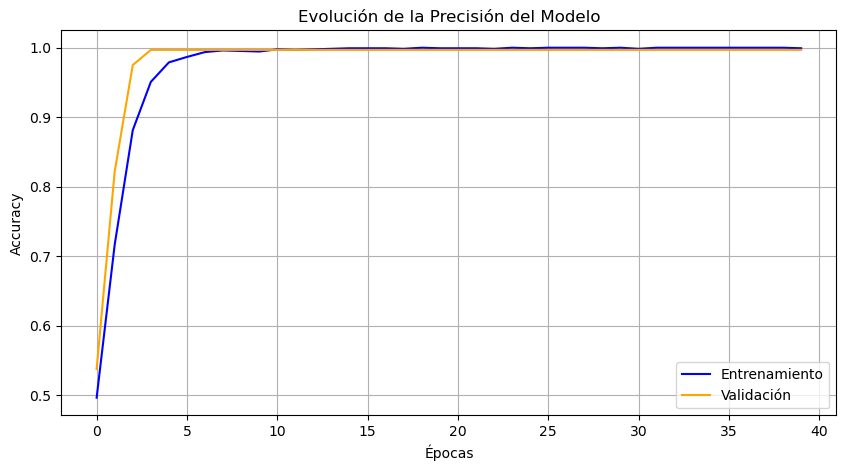

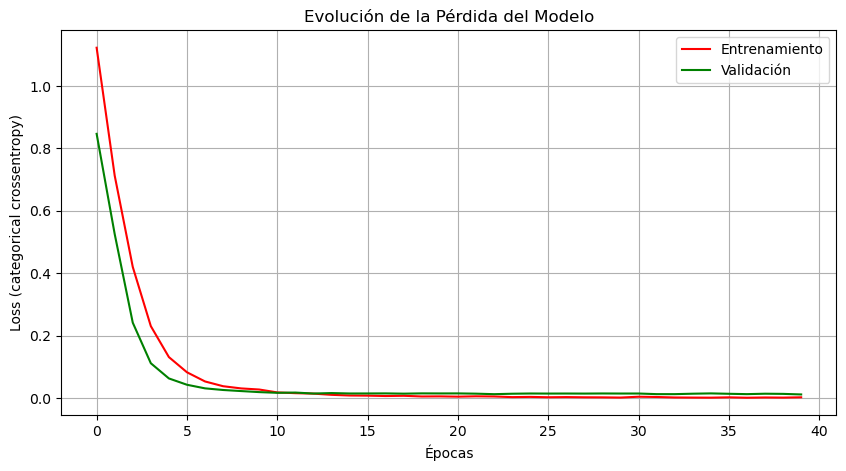

In [10]:
import matplotlib.pyplot as plt

# --- Curva de precisión ---
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Entrenamiento', color='blue')
plt.plot(history.history['val_accuracy'], label='Validación', color='orange')
plt.title('Evolución de la Precisión del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# --- Curva de pérdida ---
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Entrenamiento', color='red')
plt.plot(history.history['val_loss'], label='Validación', color='green')
plt.title('Evolución de la Pérdida del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Loss (categorical crossentropy)')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# ======================================
# DIVISIÓN 80/20 DEL DATASET
# ======================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1️ Cargar el dataset
df = pd.read_csv("riesgo_desercion.csv")
print("Datos totales:", df.shape)

# 2️ Separar variables predictoras (X) y variable objetivo (y)
X = df.drop('Riesgo_deserción', axis=1)
y = df['Riesgo_deserción']

# 3️ Convertir las variables categóricas en variables numéricas (One-Hot Encoding)
X_encoded = pd.get_dummies(X, drop_first=False)

Datos totales: (2000, 16)


In [12]:
# 4️⃣ Codificar la variable objetivo (y)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 5️⃣ Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded,
    test_size=0.2,       # 20 % para prueba
    random_state=42,     # semilla para reproducibilidad
    stratify=y_encoded   # asegura proporciones iguales por clase
)

# 6️⃣ Verificar tamaños
print(f"Datos de entrenamiento: {X_train.shape[0]} registros")
print(f"Datos de prueba: {X_test.shape[0]} registros")

# (Opcional) Guardar conjuntos por separado
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
pd.DataFrame({'Riesgo_deserción': le.inverse_transform(y_train)}).to_csv("y_train.csv", index=False)
pd.DataFrame({'Riesgo_deserción': le.inverse_transform(y_test)}).to_csv("y_test.csv", index=False)

print("✅ División completada y archivos guardados.")

Datos de entrenamiento: 1600 registros
Datos de prueba: 400 registros
✅ División completada y archivos guardados.


In [13]:
pip install pandas scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [14]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,177 (172.57 KB)

 Trainable params: 14,725 (57.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,452 (115.05 KB)

In [15]:
# 8️⃣ Guardar el modelo y los objetos de codificación
import joblib

# Guardar el modelo entrenado
model.save("modelo_riesgo_desercion.h5")
print("✅ Modelo neuronal guardado como 'modelo_riesgo_desercion.h5'")

# Guardar el LabelEncoder para decodificar las clases
joblib.dump(le, "label_encoder.pkl")

# Guardar los nombres de columnas del One-Hot Encoding (para preprocesar nuevos datos)
joblib.dump(X_encoded.columns.tolist(), "columnas_X.pkl")
print("✅ Objetos de codificación guardados correctamente.")

✅ Modelo neuronal guardado como 'modelo_riesgo_desercion.h5'
✅ Objetos de codificación guardados correctamente.


In [16]:
from tensorflow.keras.models import load_model
import joblib
import pandas as pd
import numpy as np

# 🔹 Cargar modelo y objetos
model = load_model("modelo_riesgo_desercion.h5")
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
le = joblib.load("label_encoder.pkl")
columnas_X = joblib.load("columnas_X.pkl")

# 🔹 Crear ejemplo de nuevo estudiante
nuevo_estudiante = pd.DataFrame([{
    "Sueño_horas": "Entre_6_8h",
    "Actividad_física": "Moderado",
    "Alimentación": "Moderada",
    "Estilo_de_vida": "Moderado",
    "Estrés_académico": "Moderado",
    "Apoyo_familiar": "Moderado",
    "Bienestar": "Moderado",
    "Asistencia": "Constante",
    "Horas_estudio": "De_1_3h",
    "Interés_académico": "Regular",
    "Rendimiento_académico": "Previsto",
    "Historial_académico": "Entre_11_15",
    "Carga_laboral": "No_trabaja",
    "Beca": "Parcial",
    "Deudor": "Sin_deuda"
}])

# Codificar igual que en entrenamiento
nuevo_encoded = pd.get_dummies(nuevo_estudiante)
nuevo_encoded = nuevo_encoded.reindex(columns=columnas_X, fill_value=0)
nuevo_encoded = nuevo_encoded.astype(float)  # <--- clave

# Predecir
pred = model.predict(nuevo_encoded)
clase_predicha = le.inverse_transform([np.argmax(pred)])
print(f"🎯 Riesgo de deserción predicho: {clase_predicha[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
🎯 Riesgo de deserción predicho: Riesgo_leve


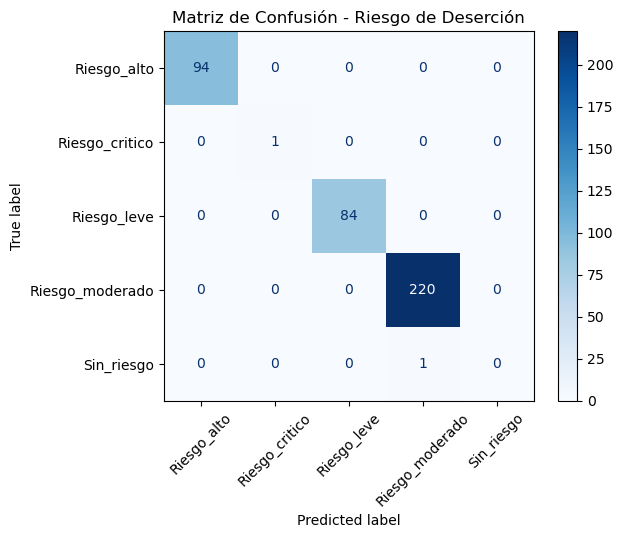

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Matriz de Confusión - Riesgo de Deserción")
plt.show()


In [18]:
# Guardar resultados en CSV
resultados = pd.DataFrame({
    "y_real": le.inverse_transform(y_true),
    "y_predicho": le.inverse_transform(y_pred_classes)
})
resultados.to_csv("resultados_prediccion.csv", index=False)
print("✅ Resultados guardados en 'resultados_prediccion.csv'")


✅ Resultados guardados en 'resultados_prediccion.csv'


In [19]:
def sugerir_accion(riesgo):
    acciones = {
        "Sin_riesgo": "Seguimiento normal y refuerzo positivo.",
        "Riesgo_leve": "Monitorear y ofrecer tutoría académica preventiva.",
        "Riesgo_moderado": "Coordinar consejería emocional y ajuste de carga académica.",
        "Riesgo_alto": "Intervención urgente: reunión con tutor, psicólogo y bienestar.",
        "Riesgo_critico": "Activar protocolo de retención individual inmediata."
    }
    return acciones.get(riesgo, "Sin acción definida.")

# Ejemplo de uso
resultado = clase_predicha[0]
accion = sugerir_accion(resultado)
print(f"🔎 Resultado: {resultado}")
print(f"🧭 Acción recomendada: {accion}")

🔎 Resultado: Riesgo_leve
🧭 Acción recomendada: Monitorear y ofrecer tutoría académica preventiva.


In [28]:
pip install pydot graphviz


Note: you may need to restart the kernel to use updated packages.


In [32]:
!apt-get install -y graphviz
!pip install pydot graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package graphviz


In [34]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [36]:
!apt-get update
!apt-get install -y graphviz


Get:1 http://deb.debian.org/debian bookworm InRelease [151 kB]
Get:2 http://deb.debian.org/debian bookworm-updates InRelease [55.4 kB]
Get:3 http://deb.debian.org/debian-security bookworm-security InRelease [48.0 kB]
Get:4 http://deb.debian.org/debian bookworm/main amd64 Packages [8791 kB]
Get:5 http://deb.debian.org/debian bookworm-updates/main amd64 Packages [6924 B]
Get:6 http://deb.debian.org/debian-security bookworm-security/main amd64 Packages [284 kB]
Fetched 9337 kB in 2s (4547 kB/s)                       
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fontconfig fontconfig-config fonts-dejavu-core fonts-liberation2
  libabsl20220623 libann0 libaom3 libavif15 libcairo2 libcdt5 libcgraph6
  libdatrie1 libdav1d6 libde265-0 libdeflate0 libfontconfig1 libfreetype6
  libfribidi0 libgav1-1 libgd3 libgraphite2-3 libgts-0.7-5 libgts-bin libgvc6
  libgvp

In [37]:
!pip install --upgrade pydot graphviz


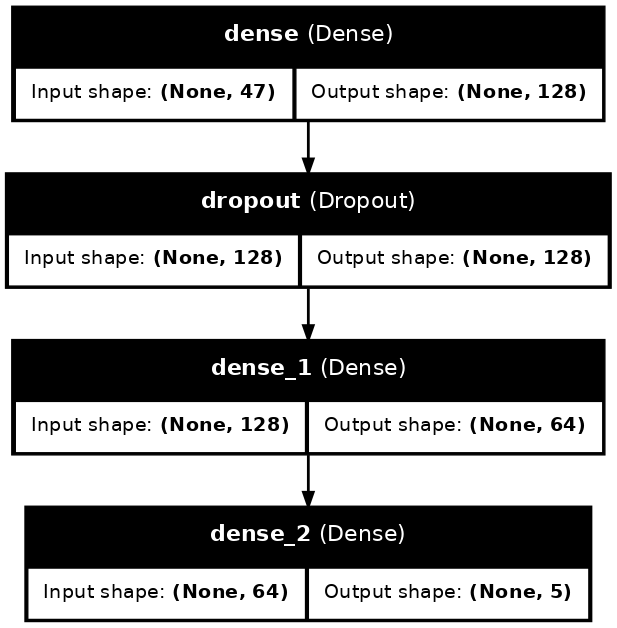

In [20]:
from tensorflow.keras.utils import plot_model

# Guardar arquitectura como imagen
plot_model(
    model,
    to_file="arquitectura_red.png",  # archivo de salida
    show_shapes=True,                # muestra las dimensiones de entrada/salida
    show_layer_names=True,           # muestra el nombre de las capas
    rankdir="TB",                    # orientación: TB (top-bottom) o LR (left-right)
    dpi=100                          # resolución de la imagen
)

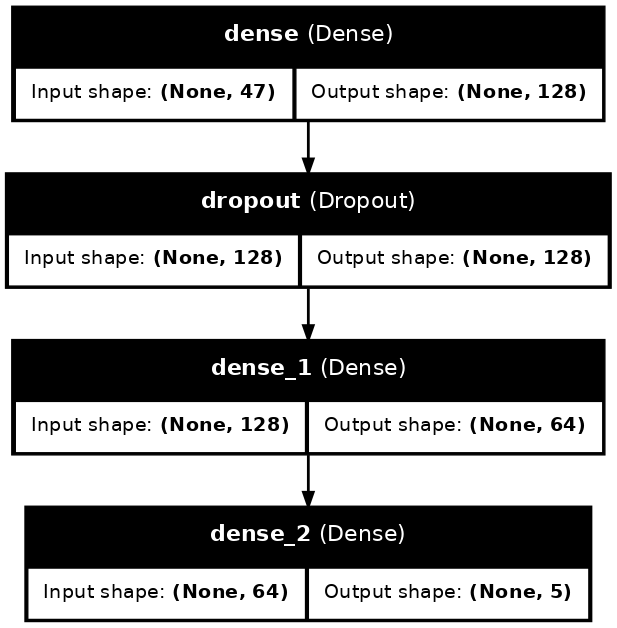

In [21]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

# Generar diagrama de arquitectura
plot_model(
    model,
    to_file="arquitectura_red.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",  # Top to Bottom
    dpi=100
)

# Mostrar imagen generada
Image(filename="arquitectura_red.png")

In [22]:
for i, layer in enumerate(model.layers):
    print(f"Capa {i+1}:")
    print(f"  Nombre: {layer.name}")
    print(f"  Tipo: {layer.__class__.__name__}")
    print(f"  Salida: {layer.output.shape}")
    print(f"  Activación: {getattr(layer, 'activation', 'N/A')}")
    print("-" * 40)

Capa 1:
  Nombre: dense
  Tipo: Dense
  Salida: (None, 128)
  Activación: <function relu at 0x747fdf5bafc0>
----------------------------------------
Capa 2:
  Nombre: dropout
  Tipo: Dropout
  Salida: (None, 128)
  Activación: N/A
----------------------------------------
Capa 3:
  Nombre: dense_1
  Tipo: Dense
  Salida: (None, 64)
  Activación: <function relu at 0x747fdf5bafc0>
----------------------------------------
Capa 4:
  Nombre: dense_2
  Tipo: Dense
  Salida: (None, 5)
  Activación: <function softmax at 0x747fdf2c9620>
----------------------------------------


In [23]:
for i, layer in enumerate(model.layers):
    weights = layer.get_weights()
    print(f"Capa {i+1}: {layer.name}")
    for j, w in enumerate(weights):
        print(f"  Pesos {j+1}: forma {w.shape}")
    print("-" * 40)


Capa 1: dense
  Pesos 1: forma (47, 128)
  Pesos 2: forma (128,)
----------------------------------------
Capa 2: dropout
----------------------------------------
Capa 3: dense_1
  Pesos 1: forma (128, 64)
  Pesos 2: forma (64,)
----------------------------------------
Capa 4: dense_2
  Pesos 1: forma (64, 5)
  Pesos 2: forma (5,)
----------------------------------------


In [24]:
for i, layer in enumerate(model.layers):
    weights = layer.get_weights()
    print(f"Capa {i+1}: {layer.name}")
    for j, w in enumerate(weights):
        print(f"  Pesos {j+1}: forma {w.shape}")
    print("-" * 40)

Capa 1: dense
  Pesos 1: forma (47, 128)
  Pesos 2: forma (128,)
----------------------------------------
Capa 2: dropout
----------------------------------------
Capa 3: dense_1
  Pesos 1: forma (128, 64)
  Pesos 2: forma (64,)
----------------------------------------
Capa 4: dense_2
  Pesos 1: forma (64, 5)
  Pesos 2: forma (5,)
----------------------------------------


In [25]:
pip install visualkeras


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install -U visualkeras


Note: you may need to restart the kernel to use updated packages.


In [29]:
import visualkeras

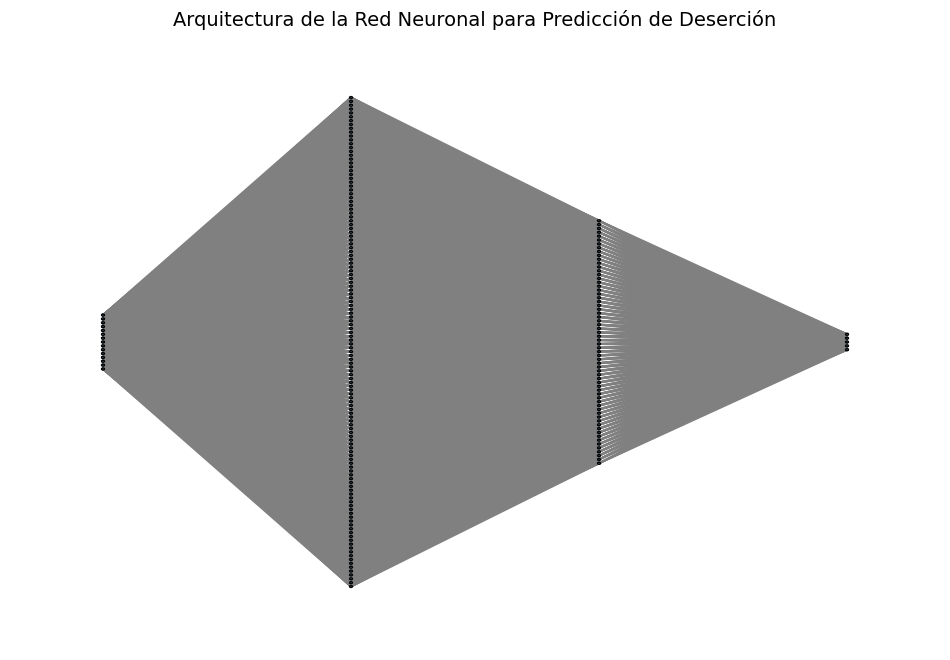

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Dibuja una red neuronal con matplotlib.
    `layer_sizes`: lista con el número de neuronas por capa (e.g., [15, 8, 4, 3])
    '''
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)

    # Nodos
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='skyblue', ec='k', zorder=4)
            ax.add_artist(circle)

    # Conexiones
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n+1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='gray')
                ax.add_artist(line)

# ======== Ajustar tamaño de cada capa según tu modelo ========
# Ejemplo para tu red: 15 variables de entrada → 128 neuronas → 64 neuronas → 5 de salida
layer_sizes = [15, 128, 64, 5]

fig = plt.figure(figsize=(12, 8))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, layer_sizes)
plt.title("Arquitectura de la Red Neuronal para Predicción de Deserción", fontsize=14)
plt.show()


In [35]:
import numpy as np

# Forzar construcción del modelo (solo 1 muestra con el tamaño correcto)
dummy_input = np.zeros((1, X_train.shape[1]))
model.predict(dummy_input)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[0.13613233, 0.1352063 , 0.08938063, 0.48738527, 0.15189552]],
      dtype=float32)

In [38]:
for layer in model.layers:
    if not hasattr(layer, 'output_shape'):
        try:
            layer.build(layer.input_shape)
        except:
            pass


In [18]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
import joblib

# === 1️⃣ Cargar modelo y objetos auxiliares ===
model = load_model("modelo_riesgo_desercion.h5")
le = joblib.load("label_encoder.pkl")
columnas_X = joblib.load("columnas_X.pkl")

# === 2️⃣ Función de predicción dinámica ===
def predecir_riesgo():
    print("\n=== 💡 Ingreso de datos del estudiante ===")

    # Solicitar información al usuario
    datos = {
        "Sueño_horas": input("Sueño_horas (Menos_de_6h / Entre_6_8h / Más_de_8h): "),
        "Actividad_física": input("Actividad_física (Sedentario / Moderado / Activa): "),
        "Alimentación": input("Alimentación (Poco_saludable / Moderada / Balanceada): "),
        "Estilo_de_vida": input("Estilo_de_vida (Poco_saludable / Moderado / Saludable): "),
        "Estrés_académico": input("Estrés_académico (Leve / Moderado / Alto / Severo / Crítico): "),
        "Apoyo_familiar": input("Apoyo_familiar (Nulo / Escaso / Moderado / Fuerte): "),
        "Bienestar": input("Bienestar (En_riesgo / Moderado / Saludable): "),
        "Asistencia": input("Asistencia (Nula / Irregular / Frecuente / Constante): "),
        "Horas_estudio": input("Horas_estudio (Menor_a_1h / De_1_3h / Más_de_3h): "),
        "Interés_académico": input("Interés_académico (Desmotivado / Regular / Muy_motivado): "),
        "Rendimiento_académico": input("Rendimiento_académico (En_inicio / En_proceso / Previsto / Logro_destacado): "),
        "Historial_académico": input("Historial_académico (Menor_a_11 / Entre_11_15 / Mayor_a_15): "),
        "Carga_laboral": input("Carga_laboral (No_trabaja / Parcial / Completa): "),
        "Beca": input("Beca (No_tiene / Parcial / Completa): "),
        "Deudor": input("Deudor (Sin_deuda / Retraso_leve / Retraso_moderado / Retraso_crítico): ")
    }

    # Convertir a DataFrame
    df_nuevo = pd.DataFrame([datos])

    # === 3️⃣ Codificar igual que el entrenamiento ===
    df_encoded = pd.get_dummies(df_nuevo)
    df_encoded = df_encoded.reindex(columns=columnas_X, fill_value=0)
    df_encoded = df_encoded.astype(float)

    # === 4️⃣ Realizar predicción ===
    pred = model.predict(df_encoded)
    clase_predicha = le.inverse_transform(np.argmax(pred, axis=1))[0]

    # === 5️⃣ Mostrar resultado ===
    print("\n🎯 Predicción del modelo:")
    print(f"👉 El estudiante presenta un **{clase_predicha.upper()}** de riesgo de deserción.\n")

# === 6️⃣ Ejecutar el modelo ===
predecir_riesgo()



=== 💡 Ingreso de datos del estudiante ===


Sueño_horas (Menos_de_6h / Entre_6_8h / Más_de_8h):  menos_de_6h
Actividad_física (Sedentario / Moderado / Activa):  Sedentario
Alimentación (Poco_saludable / Moderada / Balanceada):  moderada
Estilo_de_vida (Poco_saludable / Moderado / Saludable):  Poco_saludable
Estrés_académico (Leve / Moderado / Alto / Severo / Crítico):  severo
Apoyo_familiar (Nulo / Escaso / Moderado / Fuerte):  escaso
Bienestar (En_riesgo / Moderado / Saludable):  En_riesgo
Asistencia (Nula / Irregular / Frecuente / Constante):  irregular
Horas_estudio (Menor_a_1h / De_1_3h / Más_de_3h):  Menor_a_1h
Interés_académico (Desmotivado / Regular / Muy_motivado):  Regular
Rendimiento_académico (En_inicio / En_proceso / Previsto / Logro_destacado):  En_proceso
Historial_académico (Menor_a_11 / Entre_11_15 / Mayor_a_15):  Entre_11_15
Carga_laboral (No_trabaja / Parcial / Completa):  Parcial
Beca (No_tiene / Parcial / Completa):  No_tiene
Deudor (Sin_deuda / Retraso_leve / Retraso_moderado / Retraso_crítico):  Retraso_lev

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step

🎯 Predicción del modelo:
👉 El estudiante presenta un **RIESGO_ALTO** de riesgo de deserción.

